In [5]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Image dimensions: (450, 620, 3)


(-0.5, 619.5, 449.5, -0.5)

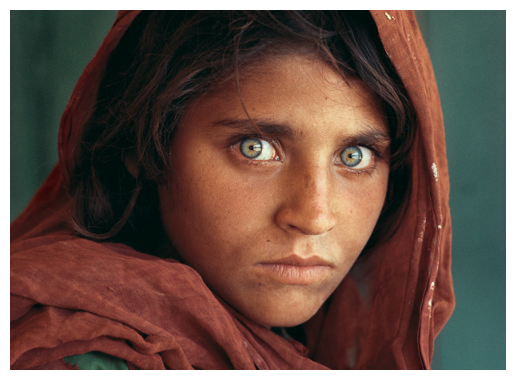

In [6]:
img = imread('afghan.jpg')

print('Image dimensions:', img.shape)

plt.figure()
plt.imshow(img)
plt.axis('off')

In [7]:
def fourier_compression(img, threshold=0.1):
    
    img_fft = np.fft.fft2(img)
    img_sort = np.sort(np.abs(img_fft.reshape(-1)))
    thresh = img_sort[int(np.floor((1-threshold)*len(img_sort)))]
    ind = np.abs(img_fft)>thresh
    img_compressed = img_fft * ind
    Alow = np.fft.ifft2(img_compressed).real
    return Alow

def compress(img, threshold=0.1):
    img_sort = np.sort(np.abs(img_fft.reshape(-1)))
    thresh = img_sort[int(np.floor((1-threshold)*len(img_sort)))]
    ind = np.abs(img_fft)>thresh
    img_compressed = img_fft * ind
    Alow = np.fft.ifft2(img_compressed).real

In [11]:
img_red = fourier_compression(img= img[:, :, 0])
img_green = fourier_compression(img= img[:, :, 1])
img_blue = fourier_compression(img= img[:, :, 2])

img_red

array([[52.83159001, 51.59072711, 56.05761048, ..., 61.96217566,
        64.23453173, 60.01608975],
       [56.18824921, 47.72656804, 47.90965094, ..., 67.15672981,
        66.84316192, 64.32699941],
       [55.0488248 , 45.55550407, 40.78168016, ..., 66.52588232,
        64.20228503, 60.70523076],
       ...,
       [86.37076936, 87.3193099 , 75.18213206, ..., 61.4164932 ,
        61.48179821, 71.20595005],
       [80.26396299, 84.87544367, 77.79110895, ..., 61.57805804,
        64.01464335, 68.95715835],
       [73.26046742, 78.35631867, 79.32541445, ..., 70.03148779,
        73.12210648, 71.41294295]])

(-0.5, 619.5, 449.5, -0.5)

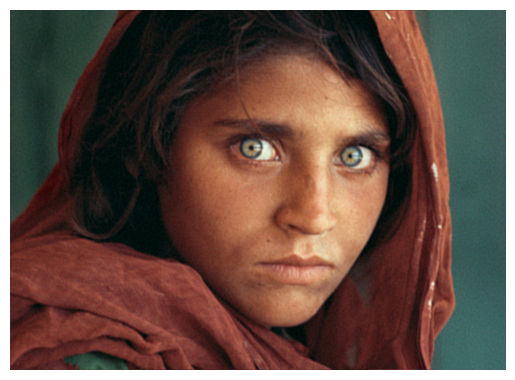

In [13]:
img_reconstructed = np.stack((img_red, img_green, img_blue), axis=-1)    
# Ensure the reconstructed image has values within the correct range for display
img_reconstructed = np.clip(img_reconstructed, 0, 255).astype('uint8')

plt.figure()
plt.imshow(img_reconstructed)
plt.axis('off')

(-0.5, 619.5, 449.5, -0.5)

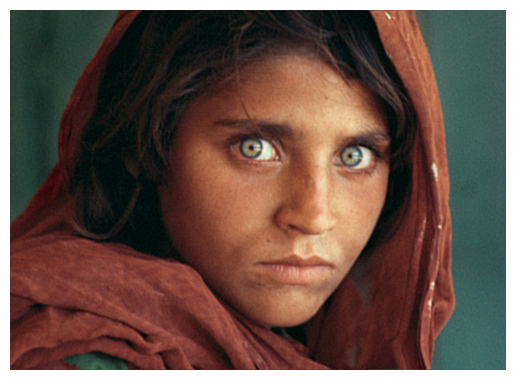

In [14]:
# Compress the image with a threshold
# Using a threshold of 10% to keep 10% of the most significant coefficients
compressed_threshold = 0.1
img_compressed = compress_image_fourier(img, threshold=compressed_threshold)
# Wyświetlanie obrazu oryginalnego i skompresowanego

plt.figure()
plt.imshow(img_compressed)
plt.axis('off')